<a href="https://colab.research.google.com/github/nghhuan05/ivp-ktlsp_groupassignment/blob/main/Spillover_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# I. IMPORT LIBRARIES
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import networkx as nx

# II. ĐỌC VÀ XỬ LÝ DATA
# 1. Đọc dữ liệu
df = pd.read_excel('VN30_preprocessed-2.xlsx')

# 2. Chuyển dữ liệu kiểu ngày
df['Date'] = pd.to_datetime(df['Date'])

# 3. Giữ lại các cột cần thiết
df = df[['Source.Name', 'Date','Price']]

# 4. Pivot sang dạng wide
price_df = df.pivot(index='Date', columns='Source.Name', values='Price').sort_index()

# 5. Sắp xếp theo ngày
price_df = price_df.sort_index()

# 6. Tính log return (để loại bỏ xu hướng)
returns = np.log(price_df/price_df.shift(1)).dropna()

print("Dữ liệu returns:")
print(returns.head())

Dữ liệu returns:
Source.Name   ACB.csv  BCE6.csv   BID.csv   CTG.csv   DGC.csv  E6BB.csv  \
Date                                                                      
2021-03-26   0.012403  0.021284 -0.003556 -0.008923 -0.005985 -0.001821   
2021-03-29   0.016807  0.008728  0.010631  0.024035  0.051021  0.026916   
2021-03-30   0.009050  0.005214  0.007028  0.009953 -0.028819  0.001763   
2021-03-31   0.000000 -0.005214  0.002330 -0.006208 -0.013278 -0.005308   
2021-04-01   0.016382 -0.001732  0.023015  0.022167  0.023442  0.036616   

Source.Name  E6SN.csv  E6WG.csv   FPT.csv   GAS.csv  ...   TCB.csv   TPB.csv  \
Date                                                 ...                       
2021-03-26  -0.001163  0.009283 -0.006549 -0.012257  ...  0.001270 -0.007460   
2021-03-29   0.002325  0.000768  0.019519  0.003357  ...  0.003800  0.025879   
2021-03-30   0.027501 -0.005387 -0.006464  0.001117  ...  0.012563  0.014493   
2021-03-31   0.044209  0.002312  0.007751  0.001114  ... 


 Thống kê mô tả:
Source.Name      ACB.csv     BCE6.csv      BID.csv      CTG.csv      DGC.csv  \
count        1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean            0.000137     0.000154     0.000079     0.000420     0.001140   
std             0.019652     0.021772     0.020406     0.020644     0.026026   
min            -0.200664    -0.072451    -0.139339    -0.117449    -0.072551   
25%            -0.006715    -0.009527    -0.008772    -0.009196    -0.011295   
50%             0.000000     0.000000     0.000000     0.001095     0.000000   
75%             0.007975     0.008456     0.009818     0.010359     0.013628   
max             0.067086     0.067666     0.067555     0.067578     0.067657   

Source.Name     E6BB.csv     E6SN.csv     E6WG.csv      FPT.csv      GAS.csv  \
count        1139.000000  1139.000000  1139.000000  1139.000000  1139.000000   
mean            0.000847     0.000064     0.000583     0.000880    -0.000025   
std             0.019

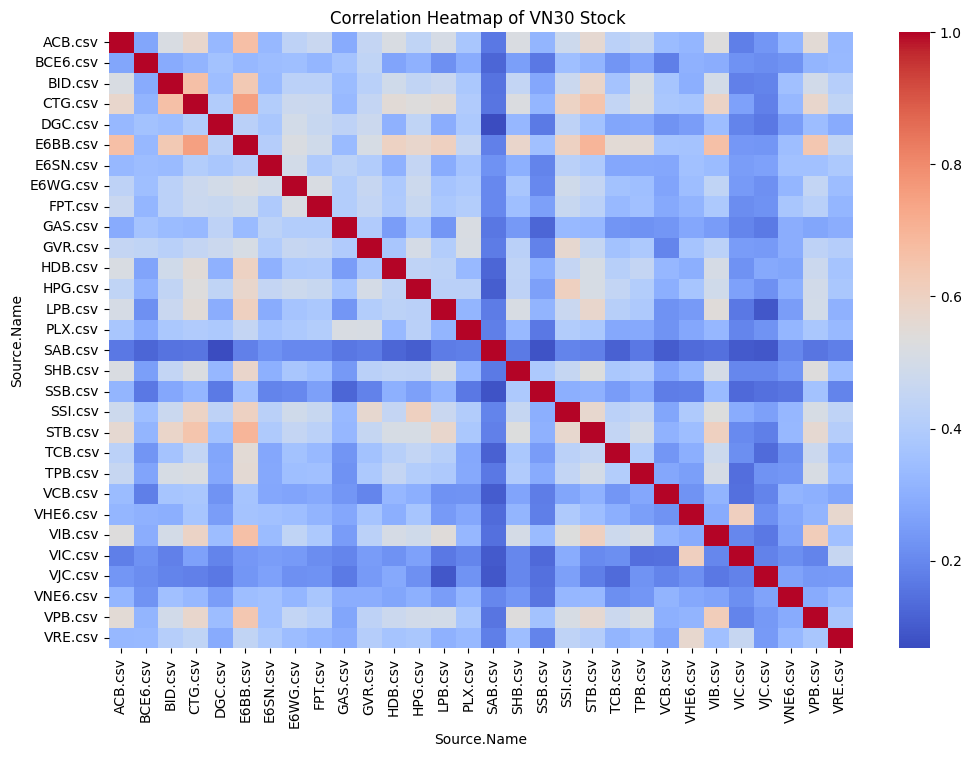

In [4]:
# III. Phân tích mô tả (EDA)
# 1. Thống kê
print("\n Thống kê mô tả:")
print(returns.describe())

# 2. Heatmap tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of VN30 Stock ")
plt.show()

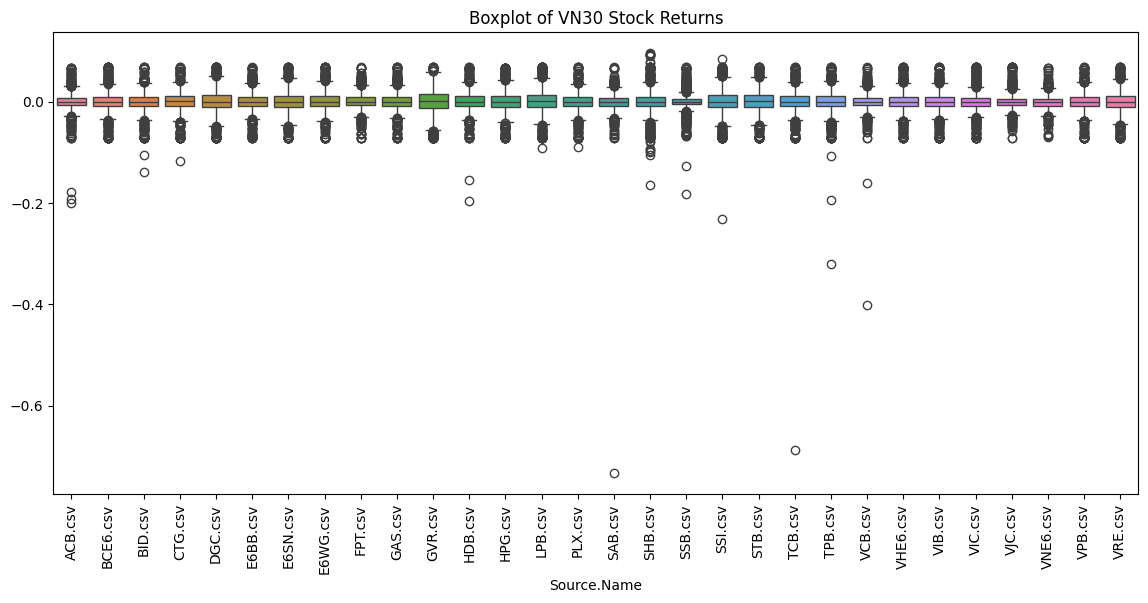

In [5]:
# 3. Boxplot biến động lợi suất
plt.figure(figsize=(14, 6))
sns.boxplot(data=returns)
plt.xticks(rotation=90)
plt.title("Boxplot of VN30 Stock Returns")
plt.show()

In [6]:
# IV. PHÂN CỤM / PHÂN NHÓM
# 1. Phân cụm theo tương quan
corr = returns.corr()
scaler = StandardScaler()
scaled_corr = scaler.fit_transform(corr)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_corr)

clusters = pd.DataFrame({
    'Stock': corr.columns,
    'Cluster': labels
})
print("\n Kết quả phân cụm cổ phiếu:")
print(clusters.sort_values('Cluster'))


 Kết quả phân cụm cổ phiếu:
       Stock  Cluster
0    ACB.csv        0
2    BID.csv        0
3    CTG.csv        0
5   E6BB.csv        0
7   E6WG.csv        0
11   HDB.csv        0
10   GVR.csv        0
8    FPT.csv        0
13   LPB.csv        0
12   HPG.csv        0
24   VIB.csv        0
21   TPB.csv        0
20   TCB.csv        0
19   STB.csv        0
18   SSI.csv        0
16   SHB.csv        0
28   VPB.csv        0
23  VHE6.csv        1
29   VRE.csv        1
25   VIC.csv        1
27  VNE6.csv        1
22   VCB.csv        1
4    DGC.csv        2
1   BCE6.csv        2
9    GAS.csv        2
14   PLX.csv        2
6   E6SN.csv        2
15   SAB.csv        3
17   SSB.csv        3
26   VJC.csv        3


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Oct, 2025
Time:                     08:57:33
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -39.6616
Nobs:                     1138.00    HQIC:                  -39.7442
Log likelihood:           14599.2    FPE:                5.21835e-18
AIC:                     -39.7944    Det(Omega_mle):     5.08294e-18
--------------------------------------------------------------------
Results for equation TCB.csv
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000121         0.000861           -0.140           0.889
L1.TCB.csv          0.018253         0.034478            0.529           0.597
L1.CTG.csv          0.031145         0.055435            0.562    

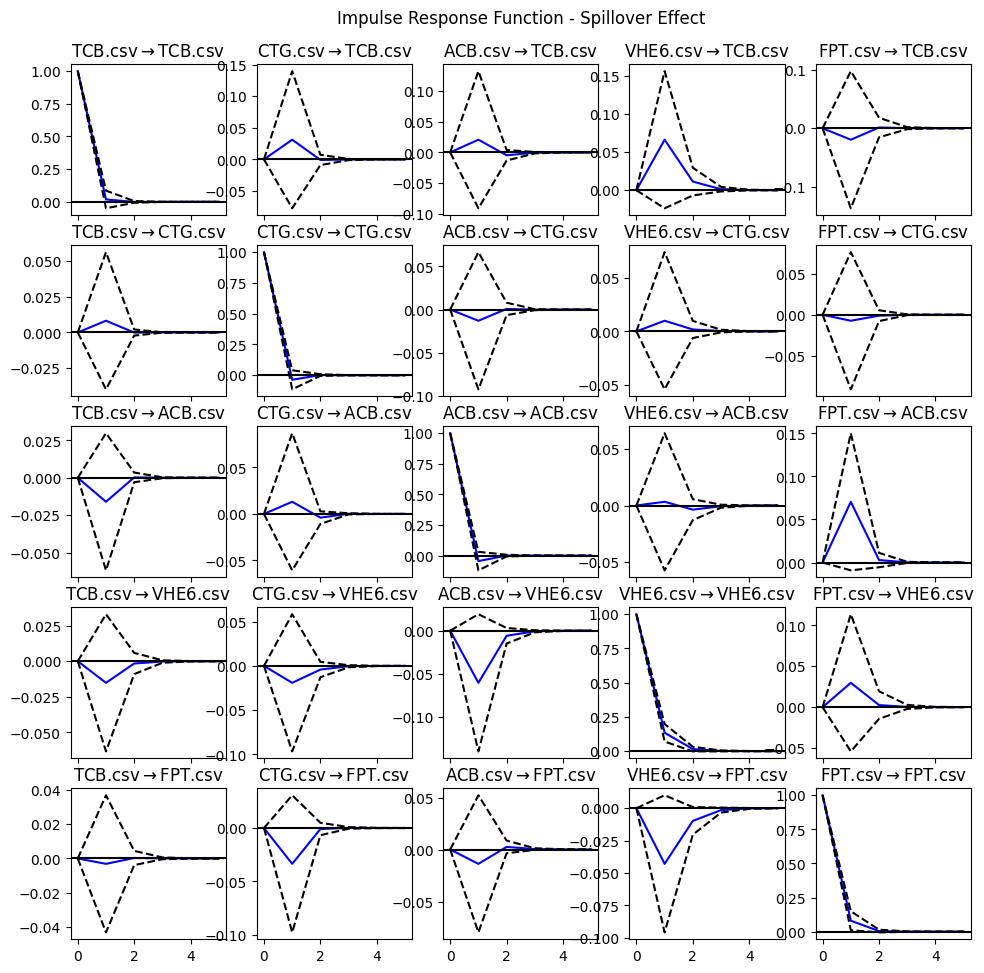

In [17]:
# V. PHÂN TÍCH SPILLOVER (VAR)
# Nhằm tránh quá nhiều biến, chọn top 5 cổ phiếu theo volume hoặc bất kỳ tiêu chí ABC nào mình muốn
# Chọn ngẫu nhiên 5 cổ phiếu theo volume
import random
random.seed(42)
subset_cols = random.sample(list(returns.columns), 5)
subset_returns = returns[subset_cols]

# Fit mô hình VAR
model = VAR(subset_returns)
results = model.fit(maxlags=5, ic='aic')
print(results.summary())

# Phân tích Impulse Response Function (IRF)
irf = results.irf(5)
irf.plot(orth=False)
plt.suptitle('Impulse Response Function - Spillover Effect')
plt.show()

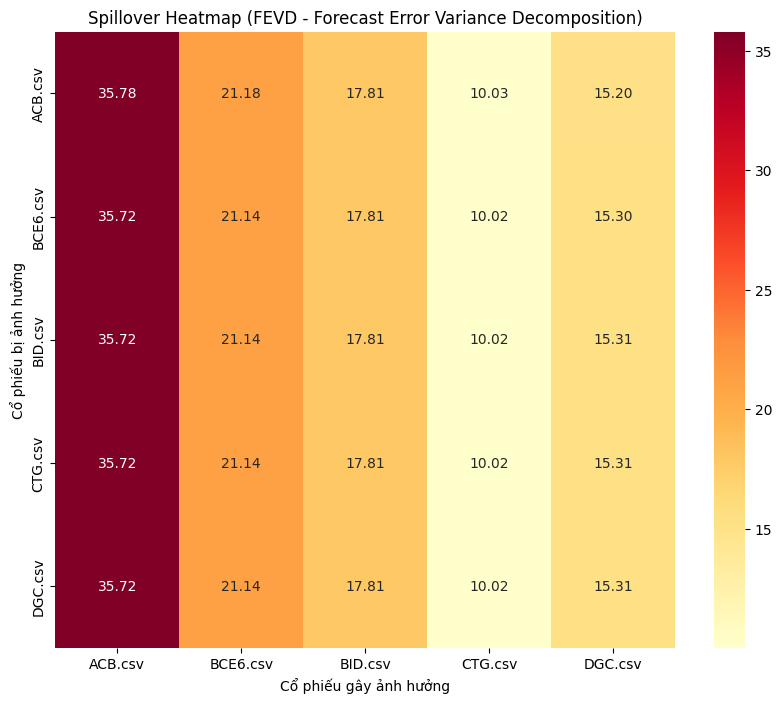

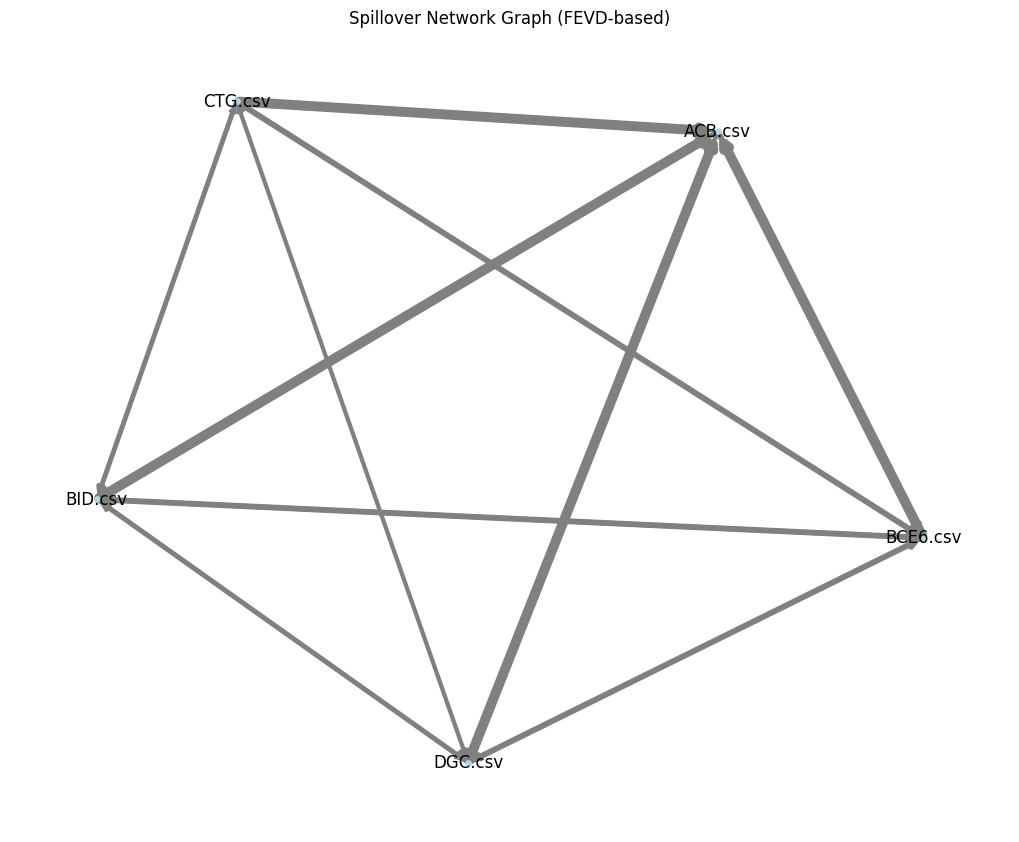

Total Spillover Index (Diebold-Yilmaz): 79.99%


In [11]:
# VI. Trực quan hóa kết quả

# 1. FEVD (Forecast Error Variance Decomposition)
fevd = results.fevd(5)
fevd_matrix = np.mean(fevd.decomp, axis=0)

# Chuẩn hóa ma trận (phần trăm ảnh hưởng)
spill_matrix = fevd_matrix/fevd_matrix.sum(axis=1, keepdims=True)*100
spill_df = pd.DataFrame(spill_matrix, index=subset_cols, columns=subset_cols)

# 2. HEATMAP LAN TỎA
plt.figure(figsize=(10,8))
sns.heatmap(spill_df, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Spillover Heatmap (FEVD - Forecast Error Variance Decomposition)")
plt.xlabel("Cổ phiếu gây ảnh hưởng")
plt.ylabel("Cổ phiếu bị ảnh hưởng")
plt.show()

# 3. NETWORK GRAPH (LAN TỎA CÓ HƯỚNG)
G = nx.DiGraph()

# Thêm các cạnh có trọng số lan tỏa (Lọc ngưỡng > 1%)
for i in range(len(spill_df)):
  for j in range(len(spill_df)):
    if i != j and spill_df.iloc[i,j]>1:
      G.add_edge(spill_df.index[i], spill_df.columns[j],
                 weight=spill_df.iloc[i,j])

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=15,
        edge_color='gray',
        width=[d['weight']/5 for (u, v, d) in edges])
plt.title("Spillover Network Graph (FEVD-based)")
plt.show()

# 4. TOTAL SPILLOVER INDEX
n = len(spill_df)
off_diag_sum = spill_df.values.sum() - np.trace(spill_df.values)
total_spillover = off_diag_sum / spill_df.values.sum() * 100
print(f"Total Spillover Index (Diebold-Yilmaz): {total_spillover:.2f}%")
